import stuff

In [5]:
from dotenv import load_dotenv
import sys
sys.path.append("../")
from shared.models import MiniPileDataset
from shared.interp import count_non_zero_feature_activations, plot_feature_activation_histogram
from shared.features import Feature, FeatureSample
import os
import json

# Enable automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2


# Load environment variables from .env file
load_dotenv()

# Access the OpenAI API key from the environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")


/Users/josephtey/Projects/auto-ed-coder/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Load the model from the pickle file
import pickle 
from shared.sae import SparseAutoencoder, SparseAutoencoderConfig
import json

# load the dataset
file_name = "files/all_sentences_with_embeddings_20240707_132959.pkl"
with open(file_name, "rb") as f:
    mini_pile_dataset = pickle.load(f)

# Load the configuration from the JSON file
config_path = "sae/20240708_195600_config.json"
with open(config_path, "r") as config_file:
    config = json.load(config_file)

# Load the pre-trained model from the pickle file
sae_config = SparseAutoencoderConfig(d_model=config["dimensions"], d_sparse=8 * config["dimensions"], sparsity_alpha=config["sparsity_alpha"])
model = SparseAutoencoder(sae_config)
model_path = "sae/20240708_195600_sae.pkl"
with open(model_path, "rb") as f:
    model_state_dict = pickle.load(f)
    model.load_state_dict(model_state_dict)

/Users/josephtey/Projects/auto-ed-coder/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# Load the log feature densities from the JSON file
log_feature_densities_path = "sae/20240719_003835/log_feature_densities.json"
with open(log_feature_densities_path, "r") as json_file:
    log_feature_densities = json.load(json_file)

print("Log feature densities loaded successfully.")


Log feature densities loaded successfully.


interpret the feature activations

In [14]:
import matplotlib.pyplot as plt

# Plotting the log feature densities as histograms
plt.figure(figsize=(10, 6))
for i, feature_density in enumerate(log_feature_densities):
    plt.bar(range(len(feature_density)), feature_density, alpha=0.5, label=f'Feature {i}')

plt.xlabel("Index", fontsize=14)
plt.ylabel("Log Feature Density", fontsize=14)
plt.title("Log Feature Densities Histogram", fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

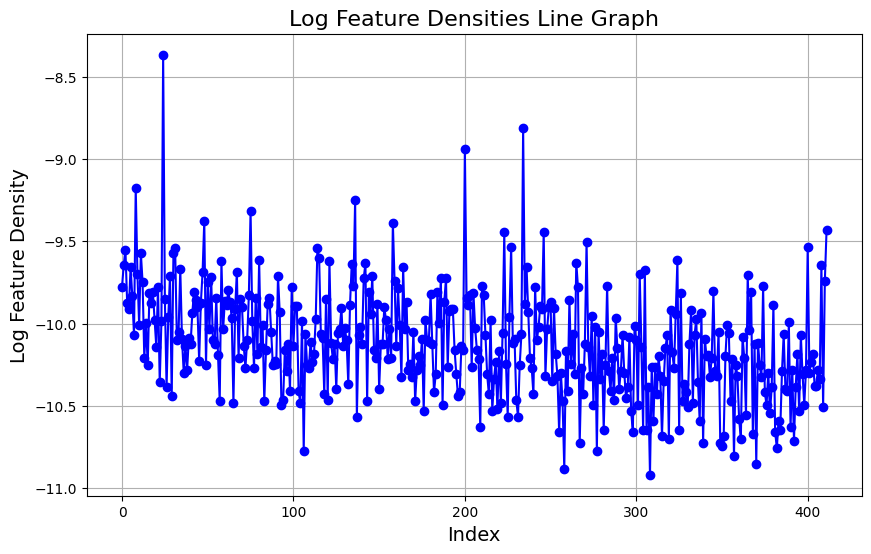

In [11]:
import matplotlib.pyplot as plt

# Plotting the log feature densities
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_feature_densities)), log_feature_densities, marker='o', linestyle='-', color='b')
plt.xlabel("Index", fontsize=14)
plt.ylabel("Log Feature Density", fontsize=14)
plt.title("Log Feature Densities Line Graph", fontsize=16)
plt.grid(True)
plt.show()


In [20]:
len(mini_pile_dataset)

210741

In [17]:
count_non_zero_feature_activations(model, mini_pile_dataset, 1000)

Average Non-Zero Elements for first 1000 samples: 15.83899974822998
Average Percentage of Non-Zero Elements: 0.26%


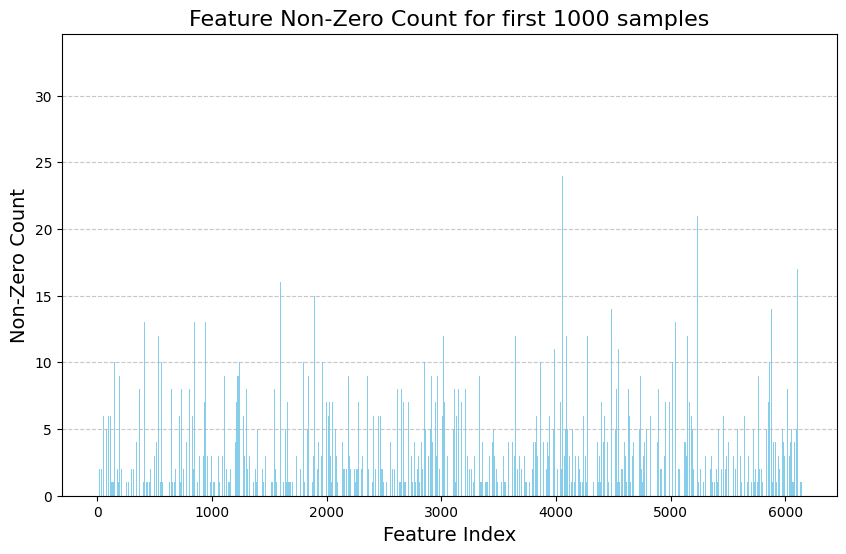

In [18]:
plot_feature_activation_histogram(model, mini_pile_dataset)

automated interp pipeline: analysis

In [7]:
import os
import json

features_folder = "features/sae_features_20240708_220948/"
features = []

for filename in os.listdir(features_folder):
    if filename.startswith("feature_") and filename.endswith(".json"):
        with open(os.path.join(features_folder, filename), "r") as json_file:
            feature_data = json.load(json_file)
            feature = Feature(**feature_data)
            features.append(feature)

features.sort(key=lambda x: x.confidence, reverse=True)

In [19]:
for feature in features[:200]:
    print(f"Index: {feature.index}, Label: {feature.label}, Confidence: {feature.confidence}")

Index: 616, Label: Scientific and conversational texts, Confidence: 100.0
Index: 285, Label: Diverse, multi-type, and multilingual content, Confidence: 100.0
Index: 552, Label: Technical and complex structured text, Confidence: 100.0
Index: 457, Label: Complex and diverse text formatting, Confidence: 100.0
Index: 477, Label: Contains multilingual text, Confidence: 100.0
Index: 748, Label: Technical and structured text with formatting, Confidence: 100.0
Index: 515, Label: Technical SQL and database tutorials, Confidence: 100.0
Index: 667, Label: Technical and scientific notations, Confidence: 100.0
Index: 488, Label: Diverse, context-rich text segments, Confidence: 100.0
Index: 502, Label: Complex mixed content, Confidence: 100.0
Index: 514, Label: Diverse and multilingual content, Confidence: 100.0
Index: 68, Label: Multilingual and structured content, Confidence: 100.0
Index: 350, Label: Multilingual and diverse topics, Confidence: 100.0
Index: 13, Label: Multilingual scientific and s